In [3]:
# import necessary libraries
import pymongo
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from IPython.display import display
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Making X and Y with before data to know the range of after crash

In [12]:
# Read the data from CSV file
data = pd.read_csv('M39Collection.csv')
data = data.dropna()

data['AfterCrash'] = data.crash
data['AfterCrash'] = data['AfterCrash'].shift(-1)


data['beforecrash1'] = data.crash
data['beforecrash1'] = data['beforecrash1'].shift(1)

data['beforeKvm1'] = data.Kvm
data['beforeKvm1'] = data['beforeKvm1'].shift(1)

data['beforetb1'] = data.total_bet
data['beforetb1'] = data['beforetb1'].shift(1)

data['beforeuc1'] = data.user_count
data['beforeuc1'] = data['beforeuc1'].shift(1)

data['beforecrash2'] = data.crash
data['beforecrash2'] = data['beforecrash2'].shift(2)

data['beforeKvm2'] = data.Kvm
data['beforeKvm2'] = data['beforeKvm2'].shift(2)

data['beforetb2'] = data.total_bet
data['beforetb2'] = data['beforetb2'].shift(2)

data['beforeuc2'] = data.user_count
data['beforeuc2'] = data['beforeuc2'].shift(2)

data['beforecrash3'] = data.crash
data['beforecrash3'] = data['beforecrash3'].shift(3)

data['beforeKvm3'] = data.Kvm
data['beforeKvm3'] = data['beforeKvm3'].shift(3)

data['beforetb3'] = data.total_bet
data['beforetb3'] = data['beforetb3'].shift(3)

data['beforeuc3'] = data.user_count
data['beforeuc3'] = data['beforeuc3'].shift(3)

data['beforecrash4'] = data.crash
data['beforecrash4'] = data['beforecrash4'].shift(4)

data['beforeKvm4'] = data.Kvm
data['beforeKvm4'] = data['beforeKvm4'].shift(4)

data['beforetb4'] = data.total_bet
data['beforetb4'] = data['beforetb4'].shift(4)

data['beforeuc4'] = data.user_count
data['beforeuc4'] = data['beforeuc4'].shift(4)

data['beforecrash5'] = data.crash
data['beforecrash5'] = data['beforecrash5'].shift(5)

data['beforeKvm5'] = data.Kvm
data['beforeKvm5'] = data['beforeKvm5'].shift(5)

data['beforetb5'] = data.total_bet
data['beforetb5'] = data['beforetb5'].shift(5)

data['beforeuc5'] = data.user_count
data['beforeuc5'] = data['beforeuc5'].shift(5)


TrueCf = data['AfterCrash']

conditions = [
    (0 <= TrueCf) & (TrueCf < 1.5),
    (1.5 <= TrueCf) & (TrueCf < 1.9),
    (1.9 <= TrueCf) & (TrueCf < 2.5),
    (2.5 <= TrueCf) & (TrueCf < 3),
    (3 <= TrueCf) & (TrueCf < 3.5),
    (3.5 <= TrueCf) & (TrueCf < 4),
    (4 <= TrueCf) & (TrueCf < 4.5),
    (4.5 <= TrueCf) & (TrueCf < 5),
    (5 <= TrueCf) & (TrueCf < 5.5),
    (5.5 <= TrueCf) & (TrueCf < 6),
    (6 <= TrueCf) & (TrueCf < 6.5),
    (6.5 <= TrueCf) & (TrueCf < 7),
    (7 <= TrueCf) & (TrueCf < 7.5),
    (7.5 <= TrueCf) & (TrueCf < 8),
    (8 <= TrueCf) & (TrueCf < 8.5),
    (8.5 <= TrueCf) & (TrueCf < 9),
    (9 <= TrueCf) & (TrueCf < 9.5),
    (9.5 <= TrueCf) & (TrueCf < 10),
    (10 <= TrueCf) & (TrueCf < 10.5),
    (10.5 <= TrueCf) & (TrueCf < 11),
    (11 <= TrueCf) & (TrueCf < 11.5),
    (11.5 <= TrueCf) & (TrueCf < 12),
    (12 <= TrueCf) & (TrueCf < 12.5),
    (12.5 <= TrueCf) & (TrueCf < 13),
    (13 <= TrueCf) & (TrueCf < 13.5),
    (13.5 <= TrueCf) & (TrueCf < 14),
    (14 <= TrueCf) & (TrueCf < 14.5),
    (14.5 <= TrueCf) & (TrueCf < 15),
    (15 <= TrueCf) & (TrueCf < 15.5),
    (15.5 <= TrueCf) & (TrueCf < 16),
    (16 <= TrueCf) & (TrueCf < 16.5),
    (16.5 <= TrueCf) & (TrueCf < 17),
    (17 <= TrueCf) & (TrueCf < 17.5),
    (17.5 <= TrueCf) & (TrueCf < 18),
    (18 <= TrueCf) & (TrueCf < 18.5),
    (18.5 <= TrueCf) & (TrueCf < 19),
    (19 <= TrueCf) & (TrueCf < 19.5),
    (19.5 <= TrueCf) & (TrueCf < 20),
    (20 <= TrueCf) & (TrueCf < 20.5),
    (20.5 <= TrueCf) & (TrueCf < 21),
    (21 <= TrueCf) & (TrueCf < 21.5),
    (21.5 <= TrueCf) & (TrueCf < 22),
    (22 <= TrueCf) & (TrueCf < 22.5),
    (22.5 <= TrueCf) & (TrueCf < 23),
    (23 <= TrueCf) & (TrueCf < 23.5),
    (23.5 <= TrueCf) & (TrueCf < 24),
    (24 <= TrueCf) & (TrueCf < 24.5),
    (24.5 <= TrueCf) & (TrueCf < 25),
    (25 <= TrueCf) & (TrueCf < 25.5),
    (25.5 <= TrueCf) & (TrueCf < 26),
    (26 <= TrueCf) & (TrueCf < 26.5),
    (26.5 <= TrueCf) & (TrueCf < 27),
    (27 <= TrueCf) & (TrueCf < 27.5),
    (27.5 <= TrueCf) & (TrueCf < 28),
    (28 <= TrueCf) & (TrueCf < 28.5),
    (28.5 <= TrueCf) & (TrueCf < 29),
    (29 <= TrueCf) & (TrueCf < 29.5),
    (29.5 <= TrueCf) & (TrueCf < 30),
    (30 <= TrueCf) & (TrueCf < 30.5),
    (30.5 <= TrueCf) & (TrueCf < 31),
    (31 <= TrueCf) & (TrueCf < 31.5)
]

choices = list(range(61))

data['TargetClass'] = np.select(conditions, choices, default=61)

data = data.dropna()

X = data.drop(['_id','AfterCrash','TargetClass','date'], axis=1)
y = data['TargetClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Machine leraning models

rf = DecisionTreeClassifier()

# rf = SVC()

# rf = KNeighborsClassifier()

# rf = GaussianNB()

# rf = RandomForestClassifier()

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Assuming y_test and y_pred are your Pandas Series
data_to_print = pd.DataFrame({'y_test': y_test[:500], 'y_pred': y_pred[:500]})

# Setting max display rows and columns to None to display all data without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Printing the DataFrame without truncation
print(data_to_print.to_string(index=False))

 y_test  y_pred
      0       0
      3       0
     14       0
      2       0
      3       0
      3       0
      0       0
      0       0
      2       0
      2       0
      0       0
      7       0
     13       0
      7       0
      3       0
      6       0
     37       0
      1       0
      4       0
     15       0
     43       0
      0       0
      8       0
      3       0
      2       0
      2       0
     43       0
      0       0
      0       0
      0       0
      1       0
      0       0
      0       0
      3       0
      0       0
      6       0
      6       0
     10       0
     22       0
      4       0
      1       0
      0       0
      1       0
      0       0
      1       0
      5       0
      0       0
      5       0
      6       0
      1       0
     12       0
      6       0
      0       0
      4       0
     20       0
      3       0
      0       0
      5       0
      0       0
      0       0
      1       0
     17 

In [10]:
X.head(5)

,Kvm,Time,account,crash,mfs_false,mfs_true,total_bet,total_wine,user_count,beforecrash1,beforeKvm1,beforetb1,beforeuc1,beforecrash2,beforeKvm2,beforetb2,beforeuc2,beforecrash3,beforeKvm3,beforetb3,beforeuc3,beforecrash4,beforeKvm4,beforetb4,beforeuc4,beforecrash5,beforeKvm5,beforetb5,beforeuc5
5,96.823894,18.4135,-1671605.93,4.12,7.0,11187,3377314.24,5048920.17,4983,2.34,48.638679,3305290.09,4854.0,2.01,39.019407,2825005.05,4525.0,1.94,216.824753,3497600.09,5377.0,3.99,366.997796,3779343.30,5149.0,2.25,377.343567,3316095.27,4394.0
6,66.290257,18.4154,2443698.74,1.66,9.0,5151,3068973.74,625275.00,5144,4.12,96.823894,3377314.24,4983.0,2.34,48.638679,3305290.09,4854.0,2.01,39.019407,2825005.05,4525.0,1.94,216.824753,3497600.09,5377.0,3.99,366.997796,3779343.30,5149.0
7,34.363484,18.4211,2308816.95,1.45,18.0,4244,2623858.19,315041.24,4242,1.66,66.290257,3068973.74,5144.0,4.12,96.823894,3377314.24,4983.0,2.34,48.638679,3305290.09,4854.0,2.01,39.019407,2825005.05,4525.0,1.94,216.824753,3497600.09,5377.0
8,83.883488,18.4229,2417512.86,1.24,8.0,3099,2624546.58,207033.72,3911,1.45,34.363484,2623858.19,4242.0,1.66,66.290257,3068973.74,5144.0,4.12,96.823894,3377314.24,4983.0,2.34,48.638679,3305290.09,4854.0,2.01,39.019407,2825005.05,4525.0
9,322.200466,18.4256,-3939653.05,6.19,2.0,14422,2398460.27,6338113.32,3722,1.24,83.883488,2624546.58,3911.0,1.45,34.363484,2623858.19,4242.0,1.66,66.290257,3068973.74,5144.0,4.12,96.823894,3377314.24,4983.0,2.34,48.638679,3305290.09,4854.0


# Feature Selection

In [ ]:
# Select top K features
from sklearn.feature_selection import SelectKBest

# To get mutual score in classification dataset
from sklearn.feature_selection import mutual_info_classif

In [8]:
fs = SelectKBest(score_func=mutual_info_classif, k=29)

fs.fit(X,y)

SelectKBest(k=29,
            score_func=<function mutual_info_classif at 0x0000026A8B147740>)

In [9]:
fs.scores_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.62883558e-03, 0.00000000e+00, 8.02506756e-03, 6.26916960e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.91966299e-03, 3.90743073e-03, 0.00000000e+00, 4.73517620e-03,
       0.00000000e+00, 1.54541228e-03, 8.60785747e-04, 1.11006615e-04,
       0.00000000e+00, 0.00000000e+00, 9.81133193e-05, 0.00000000e+00,
       0.00000000e+00, 3.11715093e-04, 7.56441230e-03, 0.00000000e+00,
       0.00000000e+00])

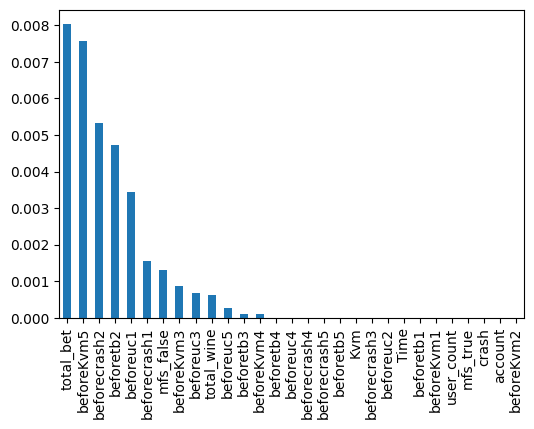

In [11]:
fs.fit(X,y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.show()

# chack accuracy

In [13]:
cross_val_score(rf,X,y, cv=5).mean()

0.3243288666354939